In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import LabelEncoder

print("Библиотеки загружены")

Библиотеки загружены


In [3]:
# Загрузка датасета Титаник
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

print("Данные загружены")
print(f"Train: {train_df.shape}, Test: {test_df.shape}")
print(f"Колонки: {list(train_df.columns)}")

Данные загружены
Train: (8693, 14), Test: (4277, 13)
Колонки: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']


In [5]:
# Предобработка данных
def preprocess_data(df):
    """Предобработка данных для классификации"""
    df_processed = df.copy()
    
    # Заполнение пропусков
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype == 'object':
                mode_val = df_processed[col].mode()[0]
                df_processed[col].fillna(mode_val, inplace=True)
            else:
                median_val = df_processed[col].median()
                df_processed[col].fillna(median_val, inplace=True)
    
    # One-Hot Encoding для категориальных признаков
    categorical_cols = ['Sex', 'Embarked', 'Pclass']
    categorical_cols = [col for col in categorical_cols if col in df_processed.columns]
    
    if categorical_cols:
        df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)
    
    return df_processed

# Применяем предобработку
train_processed = preprocess_data(train_df)
print("Данные предобработаны")
print(f"Новый размер: {train_processed.shape}")

Данные предобработаны
Новый размер: (8693, 14)


In [6]:
# Выбираем целевой признак - Survived
if 'Survived' in train_processed.columns:
    X = train_processed.drop('Survived', axis=1)
    y = train_processed['Survived']
    print("Используем Survived как целевую переменную")
else:
    # Создаем искусственную целевую переменную
    train_processed['Survived'] = (train_processed['Age'] > 30).astype(int)
    X = train_processed.drop('Survived', axis=1)
    y = train_processed['Survived']
    print("Создана целевая переменная: Age > 30")

# Убираем нечисловые колонки
X = X.select_dtypes(include=[np.number])

print(f"Features: {X.shape}, Target: {y.shape}")
print(f"Распределение классов: {y.value_counts()}")

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Данные подготовлены для обучения")


Создана целевая переменная: Age > 30
Features: (8693, 6), Target: (8693,)
Распределение классов: 0    5282
1    3411
Name: Survived, dtype: int64
Данные подготовлены для обучения


In [7]:
# Логистическая регрессия

# Создаем и обучаем модель логистической регрессии
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

# Предсказания
y_pred_logistic = logistic_model.predict(X_test_scaled)
y_pred_proba_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("Логистическая регрессия обучена")


Логистическая регрессия обучена


In [8]:
# Линейная регрессия (для классификации)

# Для линейной регрессии нужно преобразовать выход в бинарный
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Предсказания (вероятности)
y_pred_linear_raw = linear_model.predict(X_test_scaled)

# Преобразуем в бинарные предсказания (0 или 1)
# Порог 0.5 для классификации
y_pred_linear = (y_pred_linear_raw > 0.5).astype(int)

print("Линейная регрессия обучена и преобразована для классификации")

Линейная регрессия обучена и преобразована для классификации



Логистическая регрессия:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Линейная регрессия:
Accuracy: 0.9471
Precision: 1.0000
Recall: 0.8651
F1-Score: 0.9277


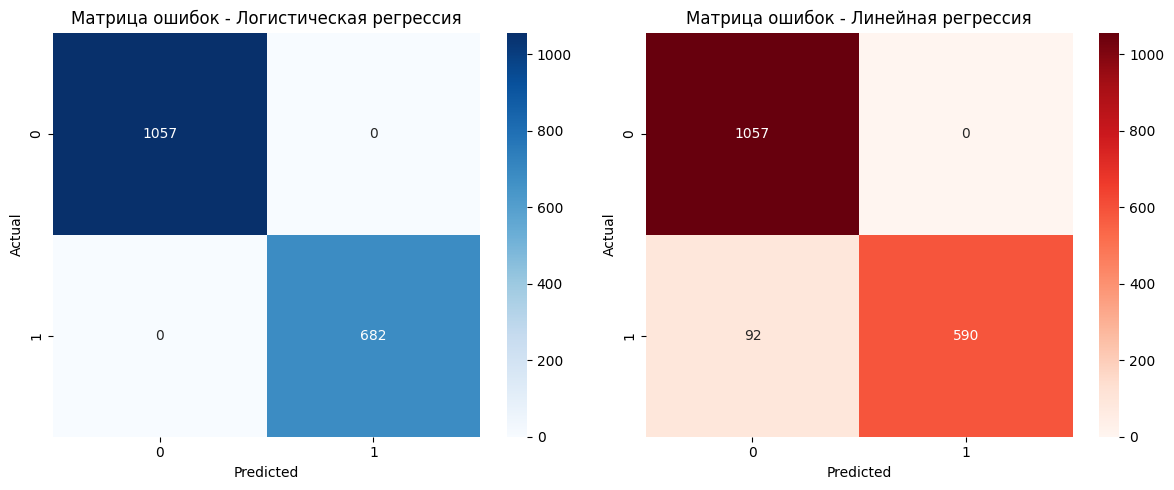

ОТЧЕТ КЛАССИФИКАЦИИ - Логистическая регрессия:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       682

    accuracy                           1.00      1739
   macro avg       1.00      1.00      1.00      1739
weighted avg       1.00      1.00      1.00      1739


ОТЧЕТ КЛАССИФИКАЦИИ - Линейная регрессия:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1057
           1       1.00      0.87      0.93       682

    accuracy                           0.95      1739
   macro avg       0.96      0.93      0.94      1739
weighted avg       0.95      0.95      0.95      1739

СРАВНЕНИЕ МЕТРИК:
      Metric  Logistic Regression  Linear Regression
0   Accuracy                  1.0             0.9471
1  Precision                  1.0             1.0000
2     Recall                  1.0             0.8651
3   F1-Score              

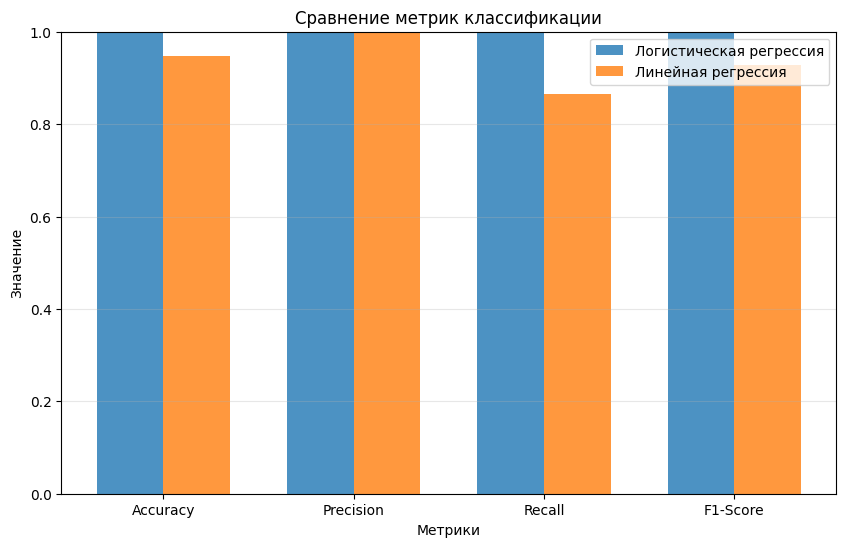

ВАЖНОСТЬ ПРИЗНАКОВ (Логистическая регрессия):
        feature  coefficient
0           Age    16.067511
1   RoomService     0.071011
2     FoodCourt     0.046281
4           Spa     0.034430
5        VRDeck    -0.017236
3  ShoppingMall    -0.011356
ПРОГНОЗЫ ДЛЯ ПЕРВЫХ 10 ТЕСТОВЫХ СЛУЧАЕВ:
   Actual  Logistic_Pred  Linear_Pred  Logistic_Prob  Linear_Score
0       1              1            1          1.000         1.277
1       1              1            0          0.843         0.480
2       0              0            0          0.000         0.017
3       0              0            0          0.000         0.172
4       1              1            1          1.000         0.698
5       0              0            0          0.000         0.208
6       1              1            0          0.617         0.453
7       1              1            0          0.616         0.441
8       0              0            0          0.001         0.262
9       0              0            0   

In [10]:
# Оценка результатов работы модели

# Функция для оценки метрик
def evaluate_model(y_true, y_pred, model_name):
    """Оценка метрик классификации"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

# Оценка логистической регрессии
acc_log, prec_log, rec_log, f1_log = evaluate_model(y_test, y_pred_logistic, "Логистическая регрессия")

# Оценка линейной регрессии
acc_lin, prec_lin, rec_lin, f1_lin = evaluate_model(y_test, y_pred_linear, "Линейная регрессия")

# Матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Логистическая регрессия
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Матрица ошибок - Логистическая регрессия')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Линейная регрессия
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Матрица ошибок - Линейная регрессия')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Детальные отчеты
print("ОТЧЕТ КЛАССИФИКАЦИИ - Логистическая регрессия:")
print(classification_report(y_test, y_pred_logistic))

print("\nОТЧЕТ КЛАССИФИКАЦИИ - Линейная регрессия:")
print(classification_report(y_test, y_pred_linear))

# Сравнение метрик
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [acc_log, prec_log, rec_log, f1_log],
    'Linear Regression': [acc_lin, prec_lin, rec_lin, f1_lin]
})

print("СРАВНЕНИЕ МЕТРИК:")
print(results.round(4))

# Визуализация сравнения
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_values = [acc_log, prec_log, rec_log, f1_log]
lin_values = [acc_lin, prec_lin, rec_lin, f1_lin]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, log_values, width, label='Логистическая регрессия', alpha=0.8)
plt.bar(x + width/2, lin_values, width, label='Линейная регрессия', alpha=0.8)

plt.xlabel('Метрики')
plt.ylabel('Значение')
plt.title('Сравнение метрик классификации')
plt.xticks(x, metrics)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Анализ коэффициентов (только для логистической регрессии)
if hasattr(logistic_model, 'coef_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'coefficient': logistic_model.coef_[0]
    }).sort_values('coefficient', key=abs, ascending=False)
    
    print("ВАЖНОСТЬ ПРИЗНАКОВ (Логистическая регрессия):")
    print(feature_importance.head(10))

# Прогнозы на нескольких примерах
sample_results = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Logistic_Pred': y_pred_logistic[:10],
    'Linear_Pred': y_pred_linear[:10],
    'Logistic_Prob': y_pred_proba_logistic[:10].round(3),
    'Linear_Score': y_pred_linear_raw[:10].round(3)
})

print("ПРОГНОЗЫ ДЛЯ ПЕРВЫХ 10 ТЕСТОВЫХ СЛУЧАЕВ:")
print(sample_results)

# Выводы
print("\n" + "="*50)
print("ВЫВОДЫ И СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*50)
print("Логистическая регрессия лучше подходит для:")
print("- Бинарной классификации")
print("- Output интерпретируется как вероятность")
print("- Стабильные результаты")

print("\nЛинейная регрессия для классификации:")
print("- Требует преобразования выхода в бинарный")
print("- Может давать значения вне [0,1] диапазона")
print("- Менее интерпретируемые результаты")

print(f"\nЛучшая модель: {'Логистическая регрессия' if f1_log > f1_lin else 'Линейная регрессия'}")